# Estadística descriptiva

In [43]:
import statistics
data = [2, 2, 2, 2, 3, 4, 4, 6, 7, 8, 8, 9, 10, 11, 35]
x = statistics.mean(data) 
print("Promedio:", x)

Promedio: 7.533333333333333


In [44]:
x = statistics.stdev(data)
print("Desviación Estándar:", x)

Desviación Estándar: 8.219025547617003


In [45]:
x = statistics.variance(data)
print("Varianza:", x)

Varianza: 67.55238095238096


In [46]:
x = statistics.median(data)
print("Mediana:", x)

Mediana: 6


In [47]:
x = statistics.mode(data)
print("Moda:", x)

Moda: 2


In [48]:
import numpy as np
data = [2, 2, 2, 2, 3, 4, 4, 6, 7, 8, 8, 9, 10, 11, 35]
print("Q1: ", np.quantile(data, .25))
print("Q2: ", np.quantile(data, .50)) 
print("Q3: ", np.quantile(data, .75))

Q1:  2.5
Q2:  6.0
Q3:  8.5


In [49]:
# Tarea 1: Calcular el rango de la variable

In [50]:
rango = max(data)-min(data)
print("Rango: ", rango)

Rango:  33


In [51]:
# Tarea 2: Calcular el coeficiente de variación de la variable

In [52]:
cv=np.std(data)/np.mean(data)
print("Coeficiente de Variación: ", cv)

Coeficiente de Variación:  1.0540265105935747


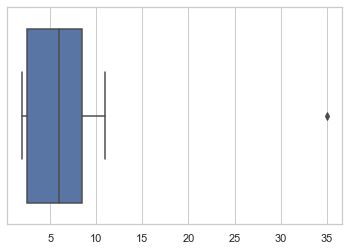

In [53]:
import seaborn as sns
sns.set(style="whitegrid")
data = [2, 2, 2, 2, 3, 4, 4, 6, 7, 8, 8, 9, 10, 11, 35]
ax = sns.boxplot(x=data)

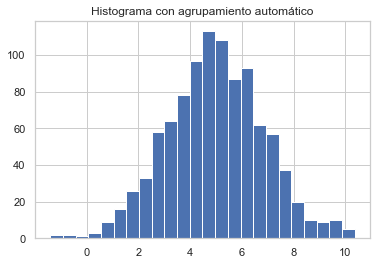

In [54]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)
a = np.hstack((rng.normal(loc=5, scale=2, size=1000)))
plt.hist(a, bins='auto')
plt.title("Histograma con agrupamiento automático")
plt.show()

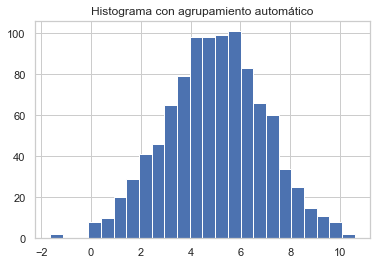

In [55]:
psn = np.random.poisson(10)
a = np.hstack((rng.normal(loc=5, scale=2, size=1000)))
plt.hist(a, bins='auto')
plt.title("Histograma con agrupamiento automático")
plt.show()

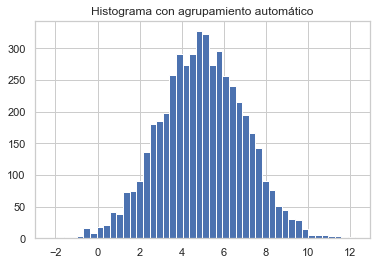

In [56]:
psn = np.random.poisson(10)
a = np.hstack((rng.normal(loc=5, scale=2, size=5000)))
plt.hist(a, bins='auto')
plt.title("Histograma con agrupamiento automático")
plt.show()

# Exploración de datos

In [57]:
# Importación de las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Invocación de los datos
df_train = pd.read_csv("Frogs_MFCCs.csv", delimiter=",") #https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29
df_train.head(10)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
5,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,Leptodactylidae,Adenomera,AdenomeraAndre,1
6,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,Leptodactylidae,Adenomera,AdenomeraAndre,1
7,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,Leptodactylidae,Adenomera,AdenomeraAndre,1
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,Leptodactylidae,Adenomera,AdenomeraAndre,1
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [59]:
# Lista de las variables
df_train.columns

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species', 'RecordID'],
      dtype='object')

In [60]:
# Resumen de estadísticos descriptivos
df_train.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


In [61]:
# Coeficiente de variación (CV) CV=std/mean

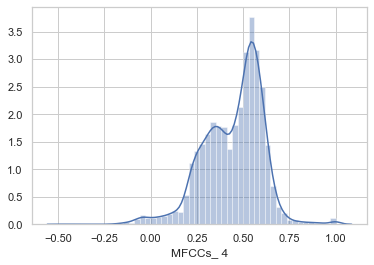

In [62]:
# Histograma
sns.distplot(df_train['MFCCs_ 4']);

In [63]:
# Simetría y kurtosis
print("Simetría: %f" % df_train['MFCCs_ 4'].skew())
print("Kurtosis: %f" % df_train['MFCCs_ 4'].kurt())

Simetría: -0.583467
Kurtosis: 1.039690


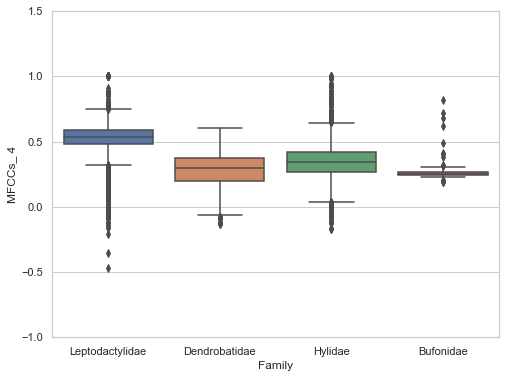

In [64]:
# Diagrama de caja para Horsepower vs Origin
var = 'Family'
data = pd.concat([df_train['MFCCs_ 4'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MFCCs_ 4", data=data)
fig.axis(ymin=-1, ymax=1.5);

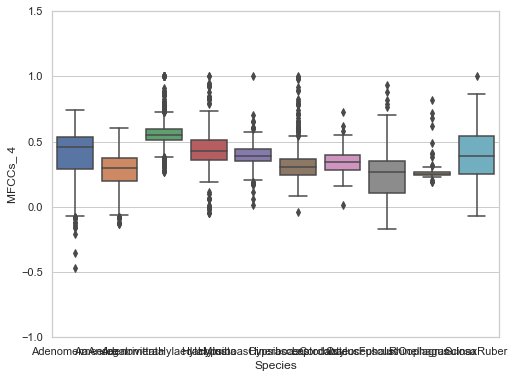

In [65]:
# Diagrama de caja para Horsepower vs Origin
var = 'Species'
data = pd.concat([df_train['MFCCs_ 4'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MFCCs_ 4", data=data)
fig.axis(ymin=-1, ymax=1.5);

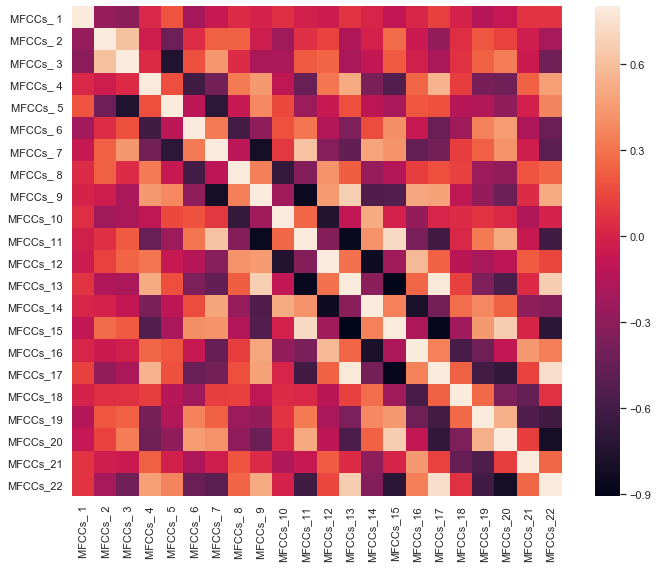

In [66]:
df_train.drop(columns = 'RecordID', inplace = True) #Estadistica no relevante
# Matriz de correlaciones y mapa de calor
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

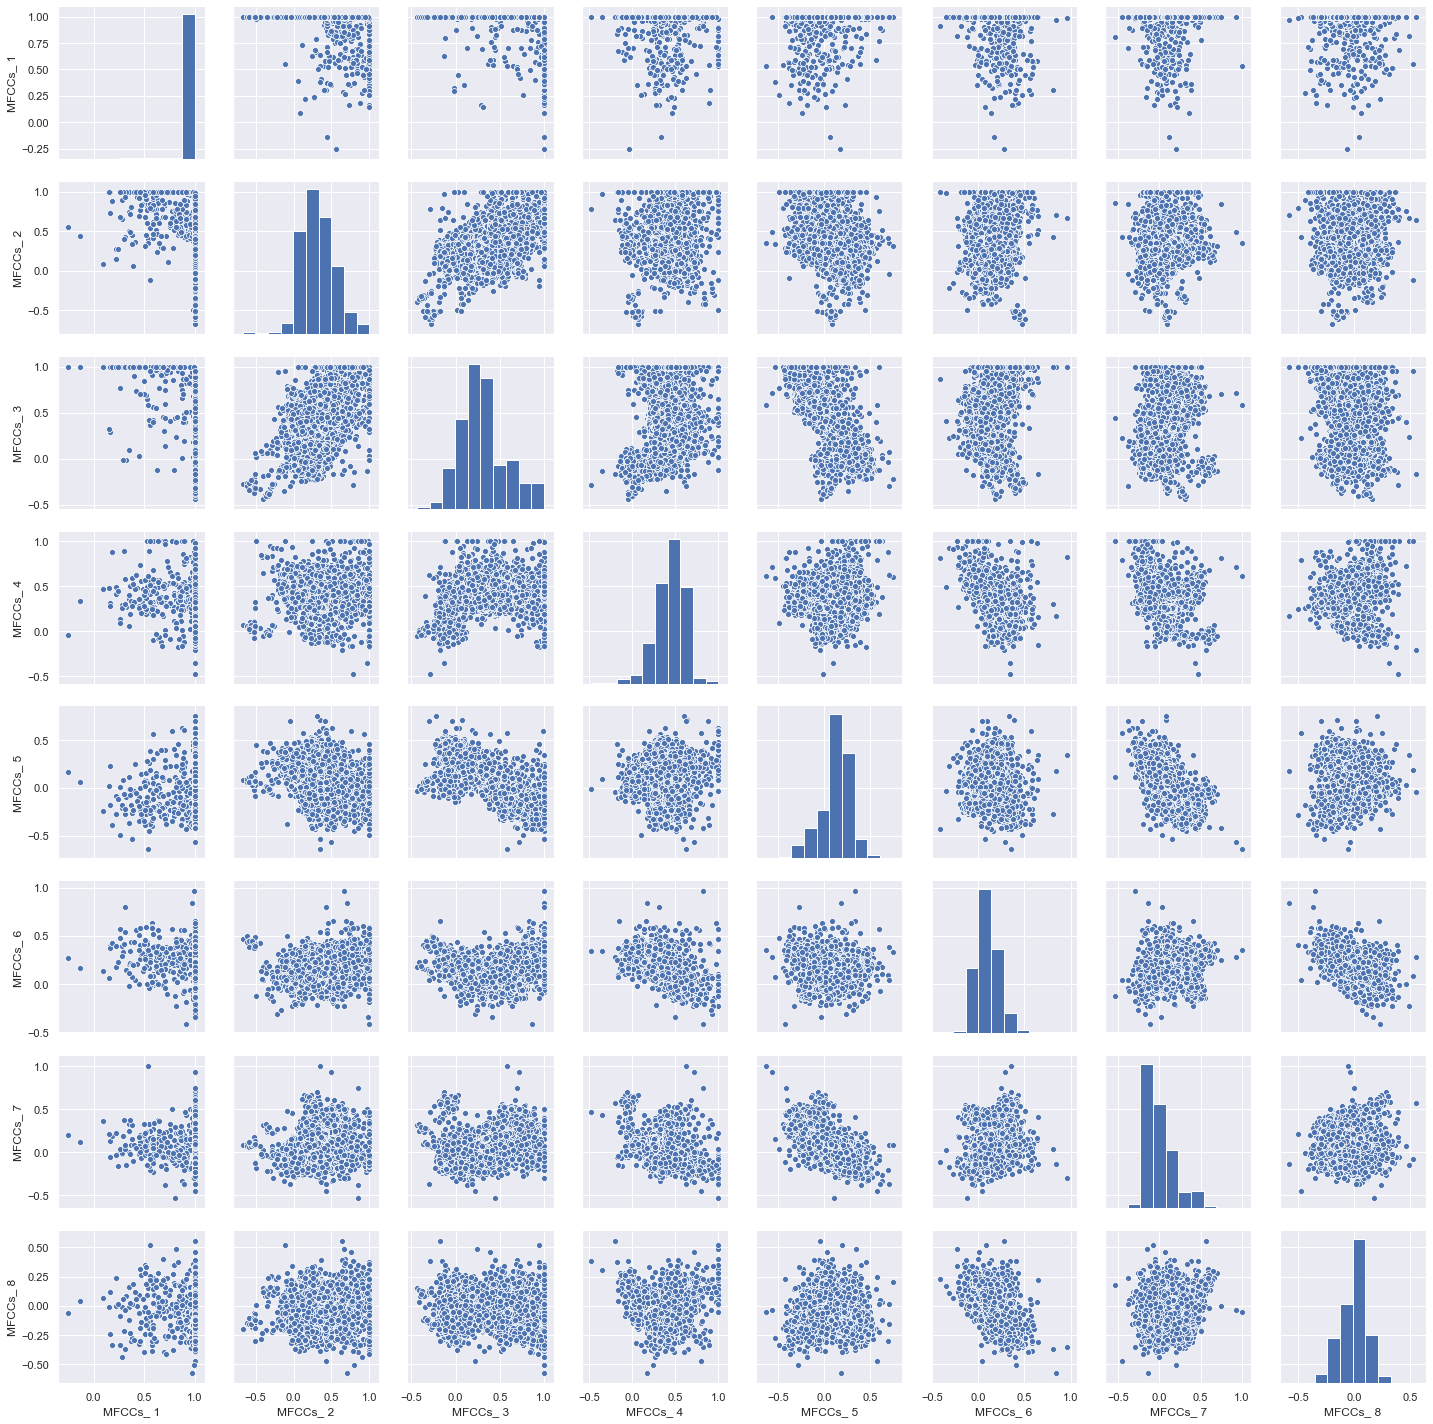

In [67]:
# Diagramas de dispersión
sns.set()
cols = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8'] #para los 8 primeros lengths
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [79]:
# Datos perdidos
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Species,0,0.0
MFCCs_12,0,0.0
MFCCs_ 2,0,0.0
MFCCs_ 3,0,0.0
MFCCs_ 4,0,0.0
MFCCs_ 5,0,0.0
MFCCs_ 6,0,0.0
MFCCs_ 7,0,0.0
MFCCs_ 8,0,0.0
MFCCs_ 9,0,0.0


In [69]:
# Tratamiento de datos perdidos
df_train = df_train.drop((missing_data[missing_data['Total'] > 0]).index,1)
df_train.isnull().sum().max() # Sólo para asegurarnos que no quedan datos perdidos...

0

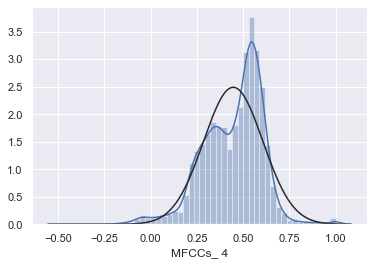

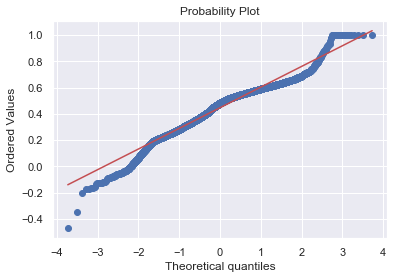

In [70]:
# Exámen de distribución de los datos
sns.distplot(df_train['MFCCs_ 4'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['MFCCs_ 4'], plot=plt)

In [76]:
# Aplicando transformación logarítmica
df_train['MFCCs_ 4'] = np.log(df_train['MFCCs_ 4']+1-min(df_train['MFCCs_ 4']))

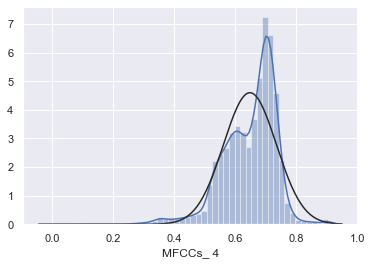

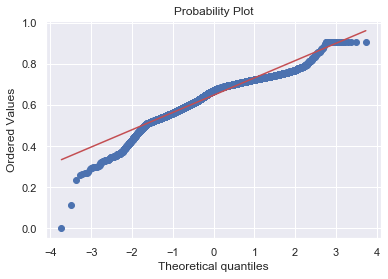

In [78]:
# Exámen de la distribución de los datos transformados
sns.distplot(df_train['MFCCs_ 4'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['MFCCs_ 4'], plot=plt)